``

### Explanation of Steps:
1. **Library Imports**: Install and import necessary libraries, including `scikit-learn-extra` for K-Medoids.
2. **Dataset Loading**: Load the credit card dataset and check for the first few rows.
3. **Data Preprocessing**: 
   - Drop unnecessary columns (`CUST_ID`).
   - Handle missing values by dropping rows with missing data.
   - Detect and remove outliers using the Interquartile Range (IQR).
4. **Scaling the Data**: Standardize the dataset using `StandardScaler`.
5. **Silhouette Method**: Use a range of cluster numbers (2 to 10) and compute the Silhouette Score to determine the best number of clusters.
6. **K-Medoids Clustering**: Apply the K-Medoids algorithm with the determined number of clusters (here, `k=2`).
7. **Visualization**:
   - Visualize the clusters using features like `'BALANCE'` and `'PURCHASES'`.
   - Optionally, apply PCA for dimensionality reduction and visualize the clusters in 2D space.

The output includes:
- A plot of **Silhouette Scores** for various cluster values to help identify the optimal number of clusters.
- A scatter plot showing the **K-Medoids clusters** based on selected features (`'BALANCE'` and `'PURCHASES'`).


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   -- ------------------------------------ 20.5/340.5 kB 162.5 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/340.5 kB 186.2 kB/s eta 0:00:02
   ---- ---------------------------------- 41.0/340.5 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 81.9/340.5 kB 381.3 kB/s eta 0:00:01
   ---------------------- --------------- 204.8/340.5 kB 827.9 kB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 1.2 MB/s eta 0:00:00
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10

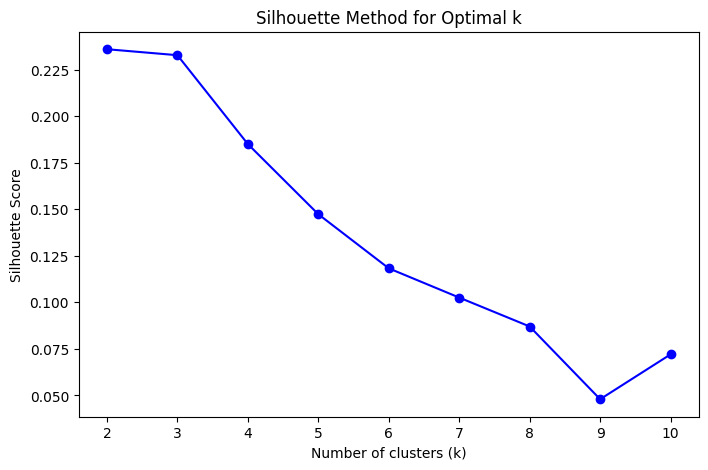

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6268\957545925.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)


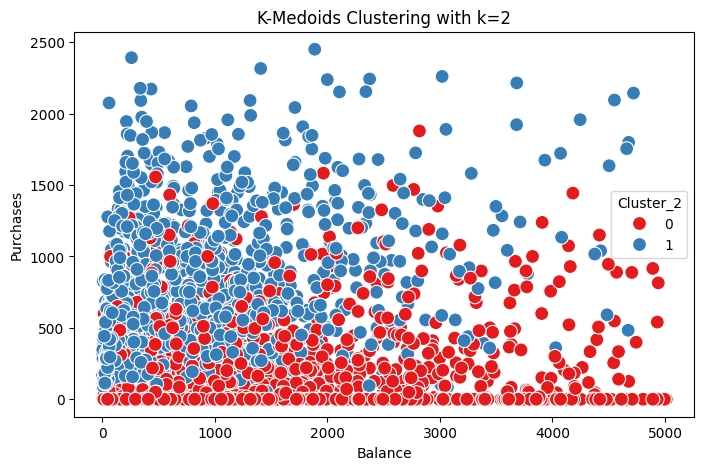

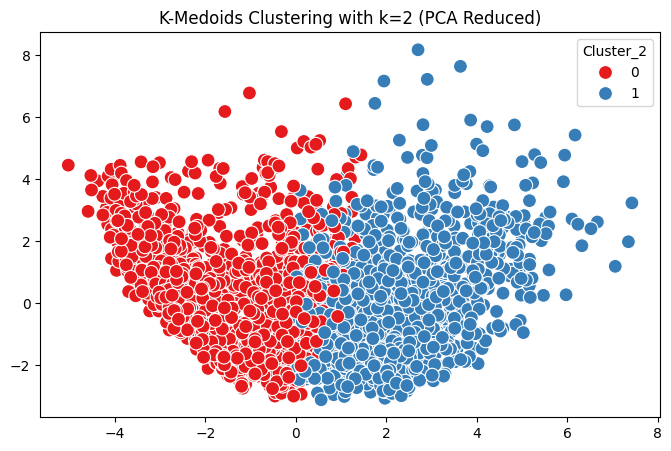

In [1]:
!pip install scikit-learn-extra

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the Credit Card dataset
cc_data = pd.read_csv('CC GENERAL.csv')

# Check the first few rows of the dataset
print(cc_data.head())

# Drop 'CUST_ID' or other non-essential columns if present
cc_data_cleaned = cc_data.drop(columns=['CUST_ID'], errors='ignore')

# Checking for missing values
print("Missing values before cleaning:", cc_data_cleaned.isnull().sum())

# Removing rows with missing values
cc_data_cleaned = cc_data_cleaned.dropna()

# Checking for missing values again after cleaning
print("Missing values after cleaning:", cc_data_cleaned.isnull().sum())

# Outlier detection using Interquartile Range (IQR) for credit card dataset
Q1 = cc_data_cleaned.quantile(0.25)
Q3 = cc_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).sum()
print("Outliers detected in each feature:\n", outliers)

# Remove extreme outliers from the dataset
cc_data_no_outliers = cc_data_cleaned[~((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).any(axis=1)]

# Check the shape of the dataset after removing outliers
print("Shape after removing outliers:", cc_data_no_outliers.shape)

# Standardize the data
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc_data_no_outliers)

# Display the first few rows of scaled data
print("Scaled data (first 5 rows):\n", pd.DataFrame(cc_scaled, columns=cc_data_no_outliers.columns).head())

# Finding the optimal number of clusters using the Silhouette score
silhouette_scores = []
K = range(2, 11)  # Start from 2 clusters since silhouette is undefined for 1 cluster

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    cluster_labels = kmedoids.fit_predict(cc_scaled)

    # Calculate the silhouette score
    score = silhouette_score(cc_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores for different number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Apply K-Medoids clustering with k=2 (based on the Silhouette score)
kmedoids_2 = KMedoids(n_clusters=2, random_state=42)
cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)

# Visualizing the clusters (using 'BALANCE' and 'PURCHASES' for visualization)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cc_data_no_outliers['BALANCE'],
                y=cc_data_no_outliers['PURCHASES'],
                hue=cc_data_no_outliers['Cluster_2'],
                palette='Set1',
                s=100)
plt.title('K-Medoids Clustering with k=2')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

# Optional: PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(cc_scaled)

# Visualizing the clusters after PCA reduction
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_components[:, 0],
                y=pca_components[:, 1],
                hue=cc_data_no_outliers['Cluster_2'],
                palette='Set1',
                s=100)
plt.title('K-Medoids Clustering with k=2 (PCA Reduced)')
plt.show()


1: Silhouette Method:

We iterate through a range of k values (e.g., 2 to 10 clusters) and apply the K-Medoids algorithm for each k.
We compute the Silhouette Score for each clustering result. The higher the Silhouette Score, the better the clustering quality.
We plot the Silhouette Scores for different values of k to visually inspect which value gives the highest score (optimal k).


2: K-Medoids Clustering:

After determining the optimal number of clusters from the Silhouette Score plot, we fit the K-Medoids model with that k.
We assign each data point to a cluster and add the resulting cluster labels to the original dataset.


3: Visualization:

We reduce the dimensionality of the data using Principal Component Analysis (PCA) to 2 components (for visualization purposes).
We plot the clusters based on the first two principal components, using different colors to represent different clusters.

To implement the **K-Medoids algorithm** on the credit card dataset and determine the optimal number of clusters using the **Silhouette Method**, we will follow these steps:

### **Steps to Implement K-Medoids and Use Silhouette Method**:

#### 1. **Load and Preprocess the Data**:
   - First, we need to load the credit card dataset and perform necessary preprocessing, such as handling missing values and scaling the features.

#### 2. **Implement K-Medoids**:
   - K-Medoids is similar to K-Means but instead of centroids, it uses actual data points as "medoids" (the center of a cluster). For this task, we will use the **`KMedoids`** algorithm from the `sklearn_extra` library or `pyclustering` package.

#### 3. **Determine the Number of Clusters Using the Silhouette Method**:
   - The **Silhouette Method** calculates how similar each point is to its own cluster compared to other clusters. The value ranges from -1 to +1:
     - **+1** indicates that the point is well clustered.
     - **0** indicates that the point is on the boundary of two clusters.
     - **-1** indicates that the point is poorly clustered.

   - We will compute the Silhouette Score for different values of `k` (number of clusters) and plot the results to identify the optimal number of clusters.

#### 4. **Cluster the Data Using K-Medoids**:
   - After determining the optimal number of clusters, we will run the K-Medoids algorithm and assign the clusters.

#### 5. **Visualize the Clusters**:
   - Finally, we can visualize the resulting clusters based on the features available in the dataset.
